<a href="https://colab.research.google.com/github/mephi82/grad_data_analysis/blob/main/blackjack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [4]:


def giveCard():
  # 1 stands for ace
  c_list = list(range(1, 11)) + [10, 10, 10]
  return(np.random.choice(c_list))

def deal2cards(given = -1):
  # return value after 2 cards and usable ace
  value, usable_ace = 0, False
  if given == -1:
    cards = [giveCard(), giveCard()]
  else:
    cards = [given, giveCard()]   
  if 1 in cards:
    value = sum(cards) + 10
    usable_ace = True
  else:
    value = sum(cards)
    usable_ace = False
  return (value, cards[0], usable_ace) #sum, showing, ace

def nextState(state, action):
  current_value, showing, usable_ace  = state
  is_end = False

  if action == 1: #hit
    card = giveCard()
    if card == 1:
        if current_value <= 10:
          current_value += 11
          usable_ace = True
        else:
          current_value += 1
    else:
      current_value += card
  else:
    is_end = True
  
  if current_value > 21: #bust
    if usable_ace:
      current_value -= 10
      usable_ace = False
    else:
      is_end = True

  return (is_end, (current_value, showing, usable_ace))

def winner(player_value, dealer_value):
  # player 1 | draw 0 | dealer -1
  winner = 0
  if player_value > 21:
      if dealer_value > 21:
          # draw
          winner = 0
      else:
          winner = -1
  else:
      if dealer_value > 21:
          winner = 1
      else:
          if player_value < dealer_value:
              winner = -1
          elif player_value > dealer_value:
              winner = 1
          else:
              # draw
              winner = 0
  return winner

def dealerPlay(state):

  is_end = False
  while is_end is False:
    # print('d',state)
    if state[0] >= 17:
      action = 0
    else:
      action = 1
    is_end, state = nextState(state, action)
    
  return(state)
dealerPlay((12, 5, False))

(18, 5, False)

In [14]:
#an episode
def gen_episode(pi, s0 = None, a0 = -1):
  if s0 is None:
    s0 = deal2cards()
    showing = -1
  else:
    showing = s0[1]
  
  d_value, showing, d_ace = deal2cards(showing)
    
  while s0[0] < 12:
    _, s0 = nextState(s0, 1)

  p_state = (s0[0], showing, s0[2])
  S = []
  A = []
  R = [] #to match index

  if (s0 is not None) and (a0>-1): #first state, action given
    S.append(p_state)
    A.append(a0)
    R.append(0)
    player_end, p_state = nextState(p_state, a0)

  player_end = False
  while player_end is False:
    # code for state update
    # ...
    S.append(p_state)
    action = pi[p_state]
    A.append(action)
    player_end, p_state = nextState(p_state, action)
    R.append(0)

    
  # code for final reward, R_t
  # ...
  d_final = dealerPlay((d_value, showing, d_ace))
  # print(p_state, d_final)
  R.append(winner(p_state[0],d_final[0]))


  return(S, A, R)




In [15]:
allS = [(value, showing, ace) for value in range(12, 22) for showing in range(1,11) for ace in [True, False]]
# policy evaluation 
# policy for 'stick when over 20'
hits = {s:1 for s in allS if s[0]<20}
sticks = {s:0 for s in allS if s[0]>=20}
pi = {**hits, **sticks}
gen_episode(pi)

([(18, 5, False)], [1], [0, 0])

In [23]:


# policy evaluation 
# policy for 'stick when over 20'
hits = {s:1 for s in allS if s[0]<20}
sticks = {s:0 for s in allS if s[0]>=20}
pi = {**hits, **sticks}

# code for initialization
V = {s:np.random.rand() for s in allS}
Re = {s:[] for s in allS}

for e in range(100000):
  # code for iteration 
  # ...
  S, A, R = gen_episode(pi)
  G = 0
  for t in reversed(range(len(S))):
    # print(t)
    G += R[t+1]
    if S[t] not in S[:t]:
      Re[S[t]].append(G)
      V[S[t]] = np.mean(Re[S[t]])


In [ ]:
# policy control

# code for initialization
pi = {s:np.random.choice([0,1]) for s in allS}
Q = {s:[np.random.random(),np.random.random()] for s in allS}
Re = {s:[[],[]] for s in allS}

for e in range(300000):
  # code for iteration 
  # ...


V = {s: max(Q[s]) for s in allS}

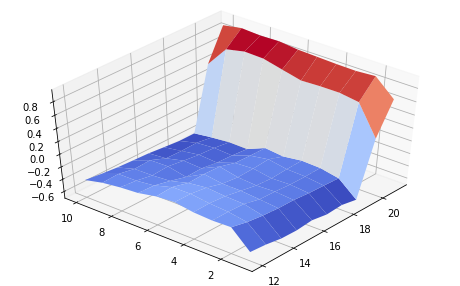

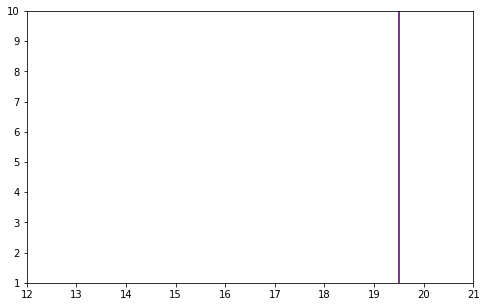

In [24]:
import matplotlib.pyplot as plt
from matplotlib import cm

def plot3d(res, ace, d3=True):
  xs = range(12, 22)
  ys = range(1,11)
  X, Y = np.meshgrid(xs, ys)
  Z = np.zeros(X.shape)
  for i in range(X.shape[0]):
    for j in range(Z.shape[1]):
      Z[i,j] = res[X[i,j], Y[i,j], ace]

  fig = plt.figure(figsize=(8,5))
  if d3:
    ax = fig.add_subplot(projection='3d')
    ax.plot_surface(X, Y, Z, cmap=cm.coolwarm)
    ax.view_init(45,220)
  else:
    ax = fig.add_subplot()
    ax.contour(X,Y,Z, levels=[0.5])

plot3d(V, False)
plot3d(pi, False, d3=False)
